In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 9: Simple Linear Regression
(Source: DAT4 Course Repository https://github.com/justmarkham/DAT4)

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$ 

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model for prediction.

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="09_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="09_slope_intercept.png">

In [2]:
np.random.seed(101)
hidden_0 = 26.25
hidden_1 = 13.13
n = 50
eps = 10 # this is noise
x = np.random.uniform(1,20,(n,))
y = x * hidden_1 + hidden_0 + np.random.normal(0,eps,(n,))

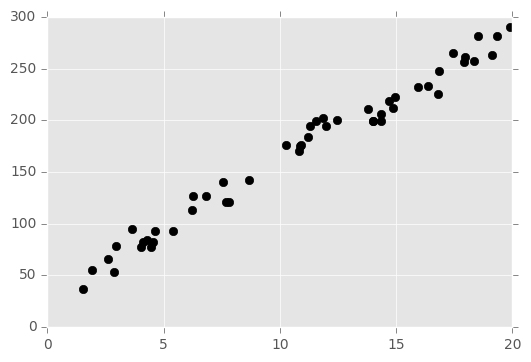

In [3]:
plt.plot(x,y,'ok')

In [4]:
def predict(beta0, beta1, x_i):
    return x_i*beta1 + beta0

def error(beta0, beta1, x_i, y_i):
    return y_i - predict(beta0, beta1, x_i)

def sq_error(beta0, beta1, x_i, y_i):
    return (y_i - predict(beta0, beta1, x_i))**2

def sumsq_error(beta0, beta1, x, y):
    return sum(sq_error(beta0, beta1, x_i, y_i) for x_i, y_i in zip(x,y))

## How to choose $\beta_0$ and $\beta_1$

We want to choose $\beta_0$ and $\beta_1$ so that our prediction is "close" to the actual. Generally, there are many ways to define "close". A common approach is to measure the "sum of squared errors". We call this solution **the least squares solution**.

Why least squares? Why not least absolutes? The least squares solution is closely related to the concept of **maximum likelihood estimation**.

In [5]:
# Trial & Error
print sumsq_error(1.1, 10.2, x, y)
print sumsq_error(10.1, 1.2, x, y)
print sumsq_error(26.25, 13.13, x, y)
print sumsq_error(25.25, 13.13, x, y)
print sumsq_error(26.25, 14.13, x, y)

185881.229292
1282778.02598
5405.19821892
5626.5313629
12144.6097836


## Can we do better than guessing?

Yes! Let's ask our old trusted friend, Calculus. 

$$
E_s = \sum_{i=1}^N (y_i - \hat{y_i})^2\\
E_s = \sum_{i=1}^N (y_i - (x_i * \beta_1 + \beta_0))^2\\
\frac{d E_s}{d\beta_0} = 0\\
\frac{d E_s}{d\beta_1} = 0\\
$$

Working out the math, we will end up with:

In [6]:
def least_square_fit(x, y):
    beta_1 = np.corrcoef(x,y)[0,1] * np.std(y) / np.std(x)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_0, beta_1

In [7]:
b0, b1 = least_square_fit(x,y)
print b0, b1

32.4197399958 12.7177558809


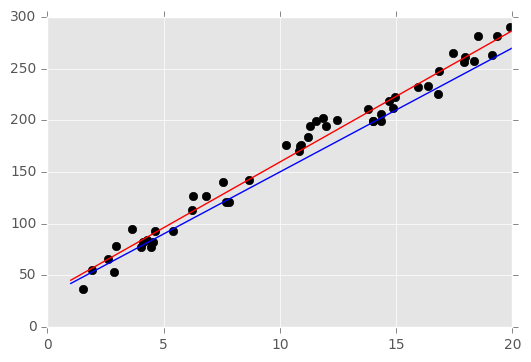

In [8]:
plt.plot(x,y,'ok')
px = np.linspace(1,20,100)
py = px*b1 + b0
plt.plot(px,py,'-r')

bb0 = 30
bb1 = 12
plt.plot(px, predict(bb0, bb1, px), '-b')

In [9]:
def goodness_of_fit(beta_0, beta_1, x, y):
    total_sq_error = np.sum((y-np.mean(y))**2)
    return 1.0 - (sumsq_error(beta_0, beta_1, x, y) / total_sq_error)

In [10]:
goodness_of_fit(b0,b1,x,y)

0.9798831555955767

## Moving to sklearn

In this class, we will be using a Python package called *sklearn* that contains a large collection of machine learning algorithm. Let's take a look at how to use linear regression model. For more information, check out this:http://scikit-learn.org/stable/modules/linear_model.html

In [11]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

# coefficient
print("beta_1: %.4f" % regr.coef_)

# intercept
print("beta_0: %.4f" % regr.intercept_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr.score(x.reshape(-1,1), y.reshape(-1,1)))


beta_1: 12.7178
beta_0: 32.4197
Variance score: 0.9799


/Users/tow02/Desktop/iccs413/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Maximum Likelihood Estimation

$ y_i = (a + bx_i) + e_i $ 

*$ e_i $ = random variable (normal distribution)

$ \beta_0 $ and $ \beta_1 $ are random variable

Imagine that we have a samle $ v_1, v_2, ..., v_n $ that comes from a 
distribution that depends on some unknown parameter $ \theta $

$$ P(v_1, v_2, v_3, v_4, ... v_n \mid \theta) $$

a.k.a the likelihood of $ \theta $ given the sample ---> $ L(\theta \mid v_1, v_2, ... v_n) $



Max $ \beta_0 $ $ \beta_1 $ = $ L(\beta_0, \beta_1 \mid (x_1, y_1) (x_2, y_2) ...) $

= $ P((x_1, y_1) (x_2, y_2) ... \mid \beta_0, \beta_1) $

= $\prod_{i=1}^{n} P((x_i, y_i) \mid \beta_0, \beta_1) $

= $\prod P(error=e_i \mid \beta_0, \beta_1) $

= $\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} exp(\frac{-(y_i - \beta_0 - \beta_{1}x_1)^2}{2\sigma^2}) $

$ y_i = \alpha + \vec{\beta} x_i + e_i $

Assumptions:

1. All columns are linearly independent
    $$ y = 3x_1 + 4x_2 $$
    
    $$  = 3(2x_2) + 4x_2 $$
    
    $$  = 10x_2 + 0x_1 $$
    
    $$ x_1 = 2x_2 $$